### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
train_beneficiary_data = pd.read_csv('Train_Beneficiarydata.csv')
train_inpatient_data = pd.read_csv('Train_Inpatientdata.csv')
train_outpatient_data = pd.read_csv('Train_Outpatientdata.csv')
test_beneficiary_data = pd.read_csv('Test_Beneficiarydata.csv')
test_outpatient_data = pd.read_csv('Test_Outpatientdata.csv')
test_inpatient_data = pd.read_csv('Test_Inpatientdata.csv')
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

### Shape of the dataset

In [3]:
print(f"Train Beneficiary : {train_beneficiary_data.shape}")
print(f"Train Inpatient : {train_inpatient_data.shape}")
print(f"Train Outpatient : {train_outpatient_data.shape}")
print(f"Test Beneficiary : {test_beneficiary_data.shape}")
print(f"Test Outpatient : {test_outpatient_data.shape}")
print(f"Test Inpatient : {test_inpatient_data.shape}")
print(f"Train data : {train_data.shape}")
print(f"Test data : {test_data.shape}")

Train Beneficiary : (138556, 25)
Train Inpatient : (40474, 30)
Train Outpatient : (517737, 27)
Test Beneficiary : (63968, 25)
Test Outpatient : (125841, 27)
Test Inpatient : (9551, 30)
Train data : (5410, 2)
Test data : (1353, 1)


### Checking the data

In [4]:
print("Train beneficiary data---------------------")
train_beneficiary_data.head()

Train beneficiary data---------------------


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [5]:
print("Train Inpatient data---------------------")
train_inpatient_data.head()

Train Inpatient data---------------------


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,4/12/2009,4/18/2009,PRV55912,26000,PHY390922,NaN,NaN,4/12/2009,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,8/31/2009,9/2/2009,PRV55907,5000,PHY318495,PHY318495,NaN,8/31/2009,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,9/17/2009,9/20/2009,PRV56046,5000,PHY372395,NaN,PHY324689,9/17/2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2/14/2009,2/22/2009,PRV52405,5000,PHY369659,PHY392961,PHY349768,2/14/2009,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,8/13/2009,8/30/2009,PRV56614,10000,PHY379376,PHY398258,NaN,8/13/2009,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [6]:
print("Train outpatient data---------------------")
train_outpatient_data.head()

Train outpatient data---------------------


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [7]:
print("Train data---------------------")
train_data.head()

Train data---------------------


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [8]:
print("Test data---------------------")
test_data.head()

Test data---------------------


,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


### Beneficiary data

#### Check missing values

<AxesSubplot:xlabel='Features', ylabel='Missing Values'>

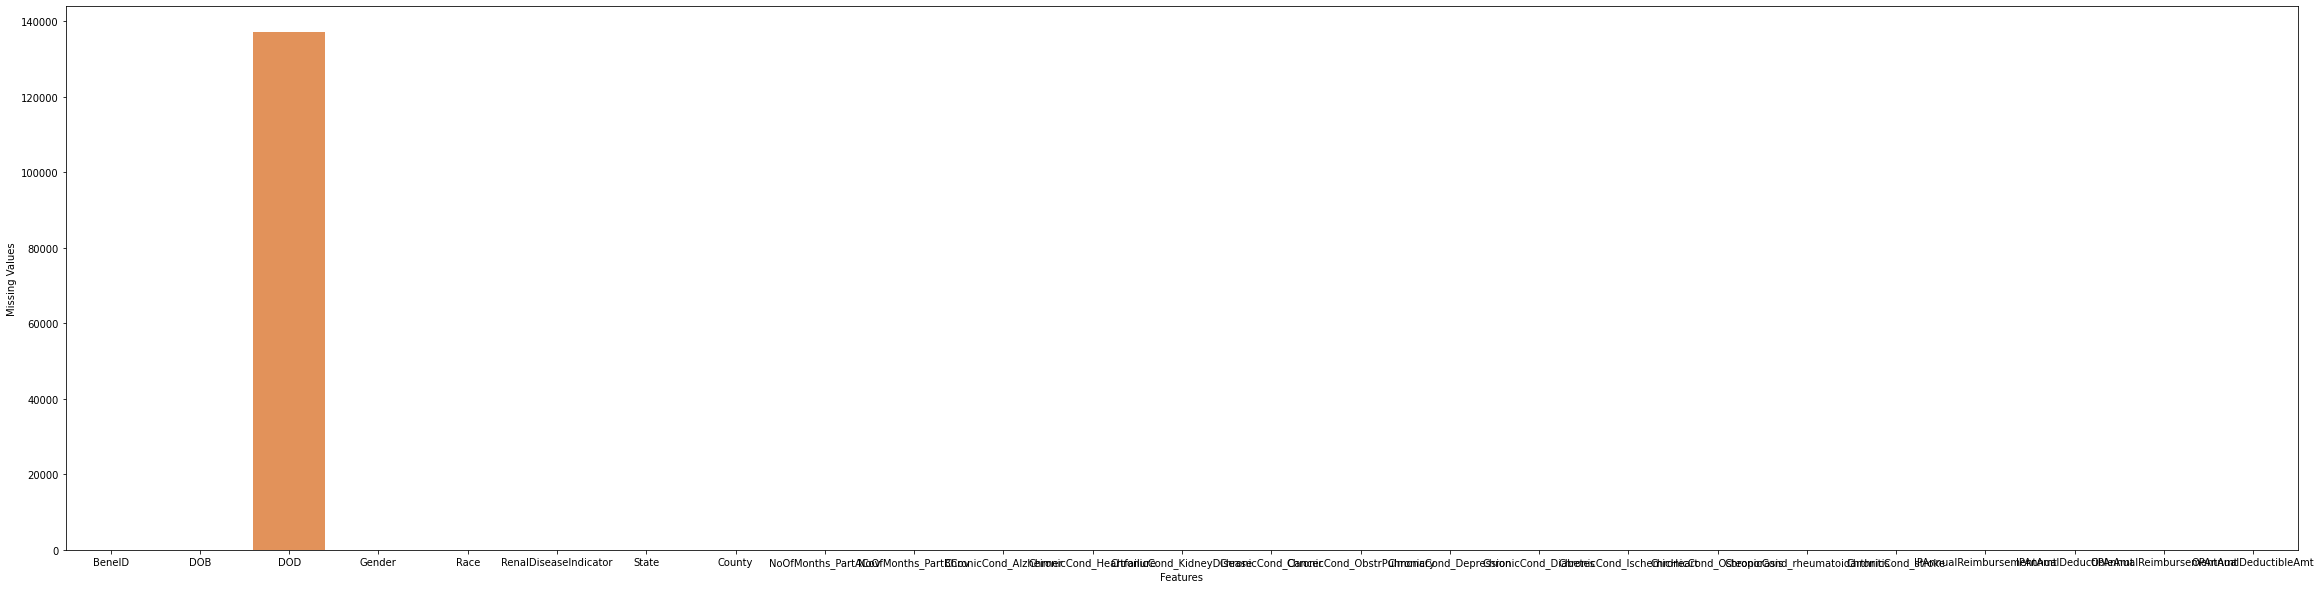

In [9]:
plt.figure(figsize=(40,10))
df = pd.DataFrame(train_beneficiary_data.isnull().sum()).reset_index()
df.columns=['Features','Missing Values']
sb.barplot(x='Features',y='Missing Values',data=df)

#### NOTE: only 'DOD' column has missing values

#### data types of columns

In [10]:
train_beneficiary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

#### Statistics of the dataset

In [11]:
train_beneficiary_data.describe(include='all')

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556,138556,1421,138556.000000,138556.000000,138556,138556.000000,138556.000000,138556.000000,138556.000000,...,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
unique,138556,900,11,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BENE15688,1939-10-01,2009-12-01,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,540,182,NaN,NaN,118978,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.570932,1.254511,NaN,25.666734,374.424745,11.907727,11.910145,...,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,NaN,NaN,NaN,0.494945,0.717007,NaN,15.223443,266.277581,1.032332,0.936893,...,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,NaN,NaN,NaN,1.000000,1.000000,NaN,11.000000,141.000000,12.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,NaN,NaN,NaN,2.000000,1.000000,NaN,25.000000,340.000000,12.000000,12.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,NaN,NaN,NaN,2.000000,1.000000,NaN,39.000000,570.000000,12.000000,12.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000


#### Replace '2' with '0' in all the chronic conditions as it represents not having chronic disease

In [12]:
train_beneficiary_data = train_beneficiary_data.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

test_beneficiary_data = test_beneficiary_data.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

### In RenalDiseaseIndicator replace 'Y' with 1

In [13]:
train_beneficiary_data = train_beneficiary_data.replace({'RenalDiseaseIndicator': 'Y'}, 1)
test_beneficiary_data = test_beneficiary_data.replace({'RenalDiseaseIndicator': 'Y'}, 1)

#### Convert DOB,DOD in single column

In [14]:
train_beneficiary_data['DOB'] = pd.to_datetime(train_beneficiary_data['DOB'])
train_beneficiary_data['DOD'] = pd.to_datetime(train_beneficiary_data['DOD'])
train_beneficiary_data['Age'] = round((train_beneficiary_data['DOD']-train_beneficiary_data['DOB']).dt.days/365,2)

test_beneficiary_data['DOB'] = pd.to_datetime(test_beneficiary_data['DOB'])
test_beneficiary_data['DOD'] = pd.to_datetime(test_beneficiary_data['DOD'])
test_beneficiary_data['Age'] = round((test_beneficiary_data['DOD']-test_beneficiary_data['DOB']).dt.days/365,2)

In [15]:
train_beneficiary_data.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

#### As there are null values present in Age column because DOD is not there for some patients, so we will consider the data till 2009 as it is the maximum year of DOD

In [16]:
train_beneficiary_data['Age'].fillna(round((pd.to_datetime('2009-01-01')-train_beneficiary_data['DOB']).dt.days/365,2),inplace=True)
test_beneficiary_data['Age'].fillna(round((pd.to_datetime('2009-01-01')-test_beneficiary_data['DOB']).dt.days/365,2),inplace=True)

#### Add new variable 'WhetherDeadOrNot'

In [17]:
train_beneficiary_data.loc[train_beneficiary_data.DOD.isnull(),'WhetherDeadOrNot']=0
train_beneficiary_data.loc[train_beneficiary_data.DOD.notna(),'WhetherDeadOrNot']=1

test_beneficiary_data.loc[test_beneficiary_data.DOD.isnull(),'WhetherDeadOrNot']=0
test_beneficiary_data.loc[test_beneficiary_data.DOD.notna(),'WhetherDeadOrNot']=1

### Inpatient data

#### Check missing values

<AxesSubplot:xlabel='Missing Values', ylabel='Features'>

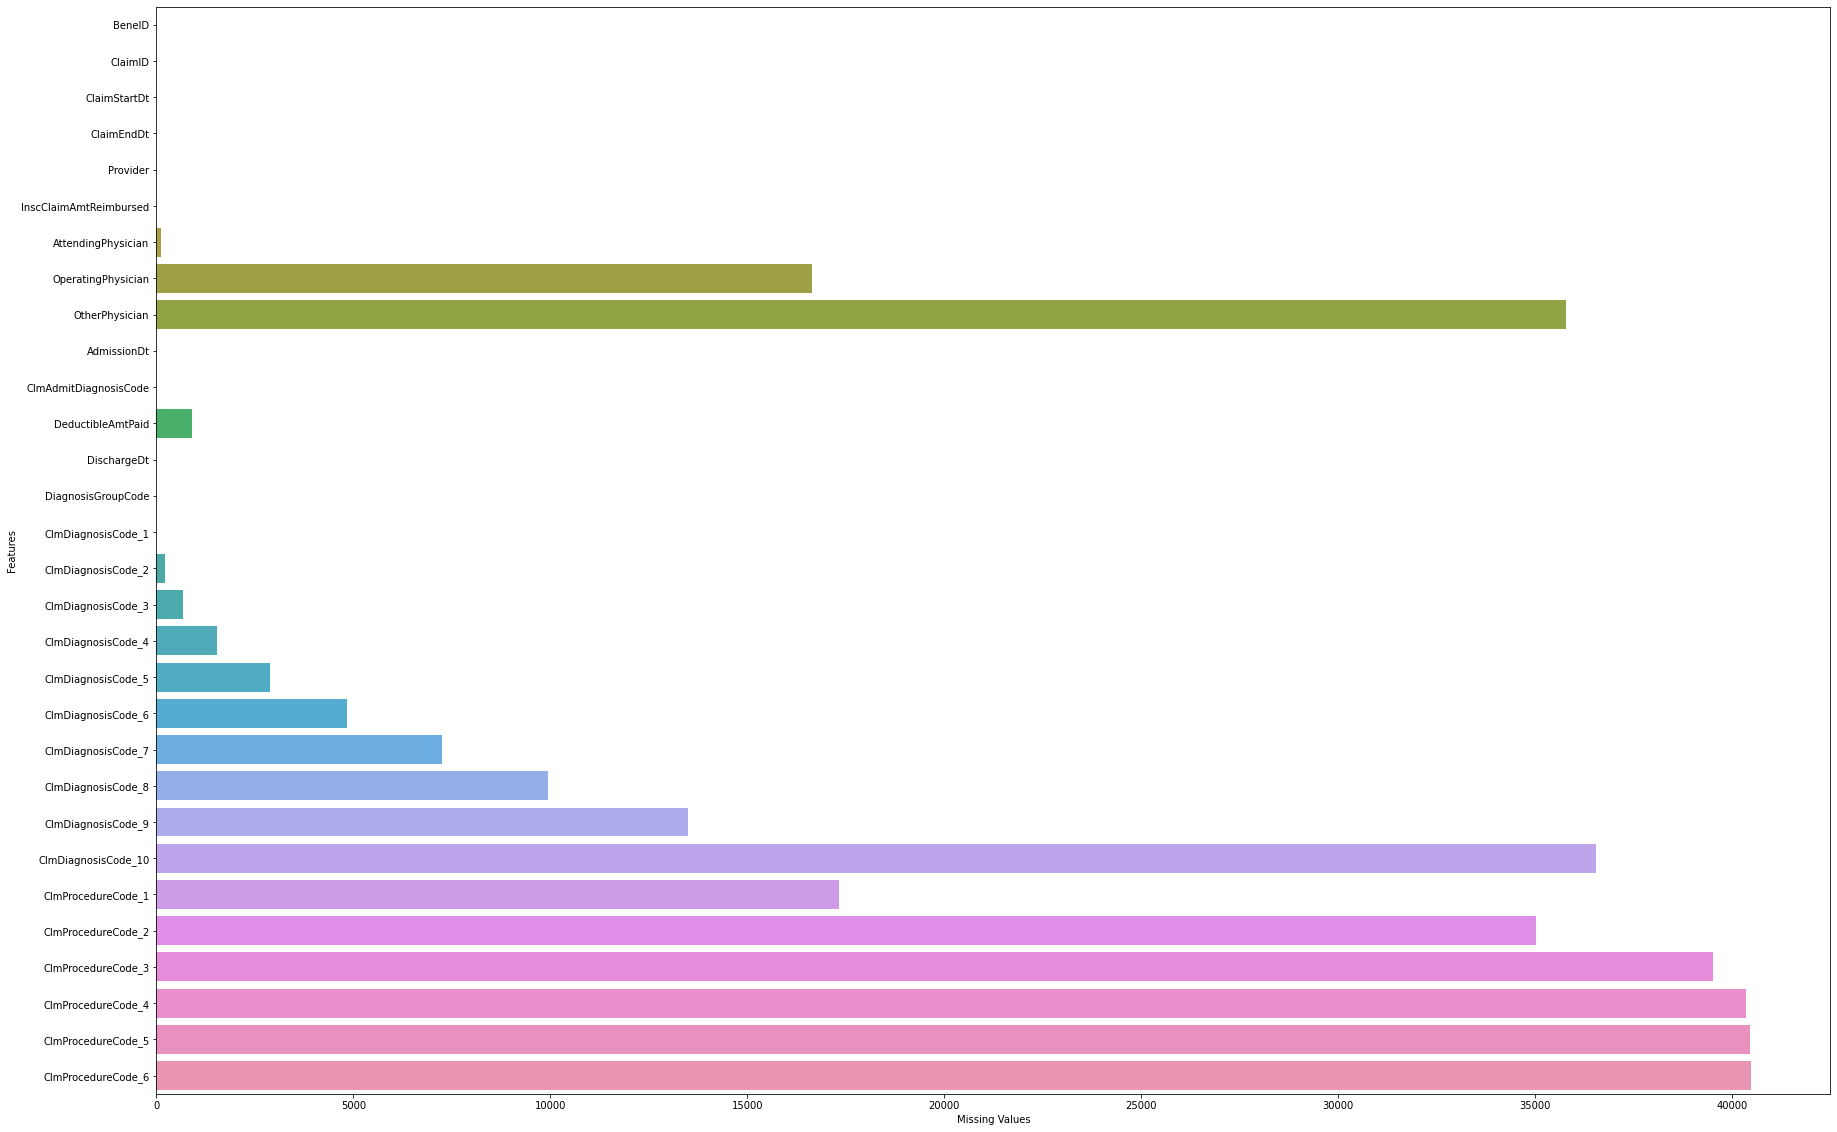

In [18]:
plt.figure(figsize=(30,20))
df1 = pd.DataFrame(train_inpatient_data.isnull().sum()).reset_index()
df1.columns=['Features','Missing Values']
sb.barplot(x='Missing Values',y='Features',data=df1)

#### Create new column for Number of days admit in hospital

In [19]:
train_inpatient_data['AdmissionDt'] = pd.to_datetime(train_inpatient_data['AdmissionDt'])
train_inpatient_data['DischargeDt'] = pd.to_datetime(train_inpatient_data['DischargeDt'])
train_inpatient_data['DaysInHospital'] = round((train_inpatient_data['DischargeDt']-train_inpatient_data['AdmissionDt']).dt.days/365,2)

test_inpatient_data['AdmissionDt'] = pd.to_datetime(test_inpatient_data['AdmissionDt'])
test_inpatient_data['DischargeDt'] = pd.to_datetime(test_inpatient_data['DischargeDt'])
test_inpatient_data['DaysInHospital'] = round((test_inpatient_data['DischargeDt']-test_inpatient_data['AdmissionDt']).dt.days/365,2)

#### Outpatient data

#### Check null values

<AxesSubplot:xlabel='Missing Values', ylabel='Features'>

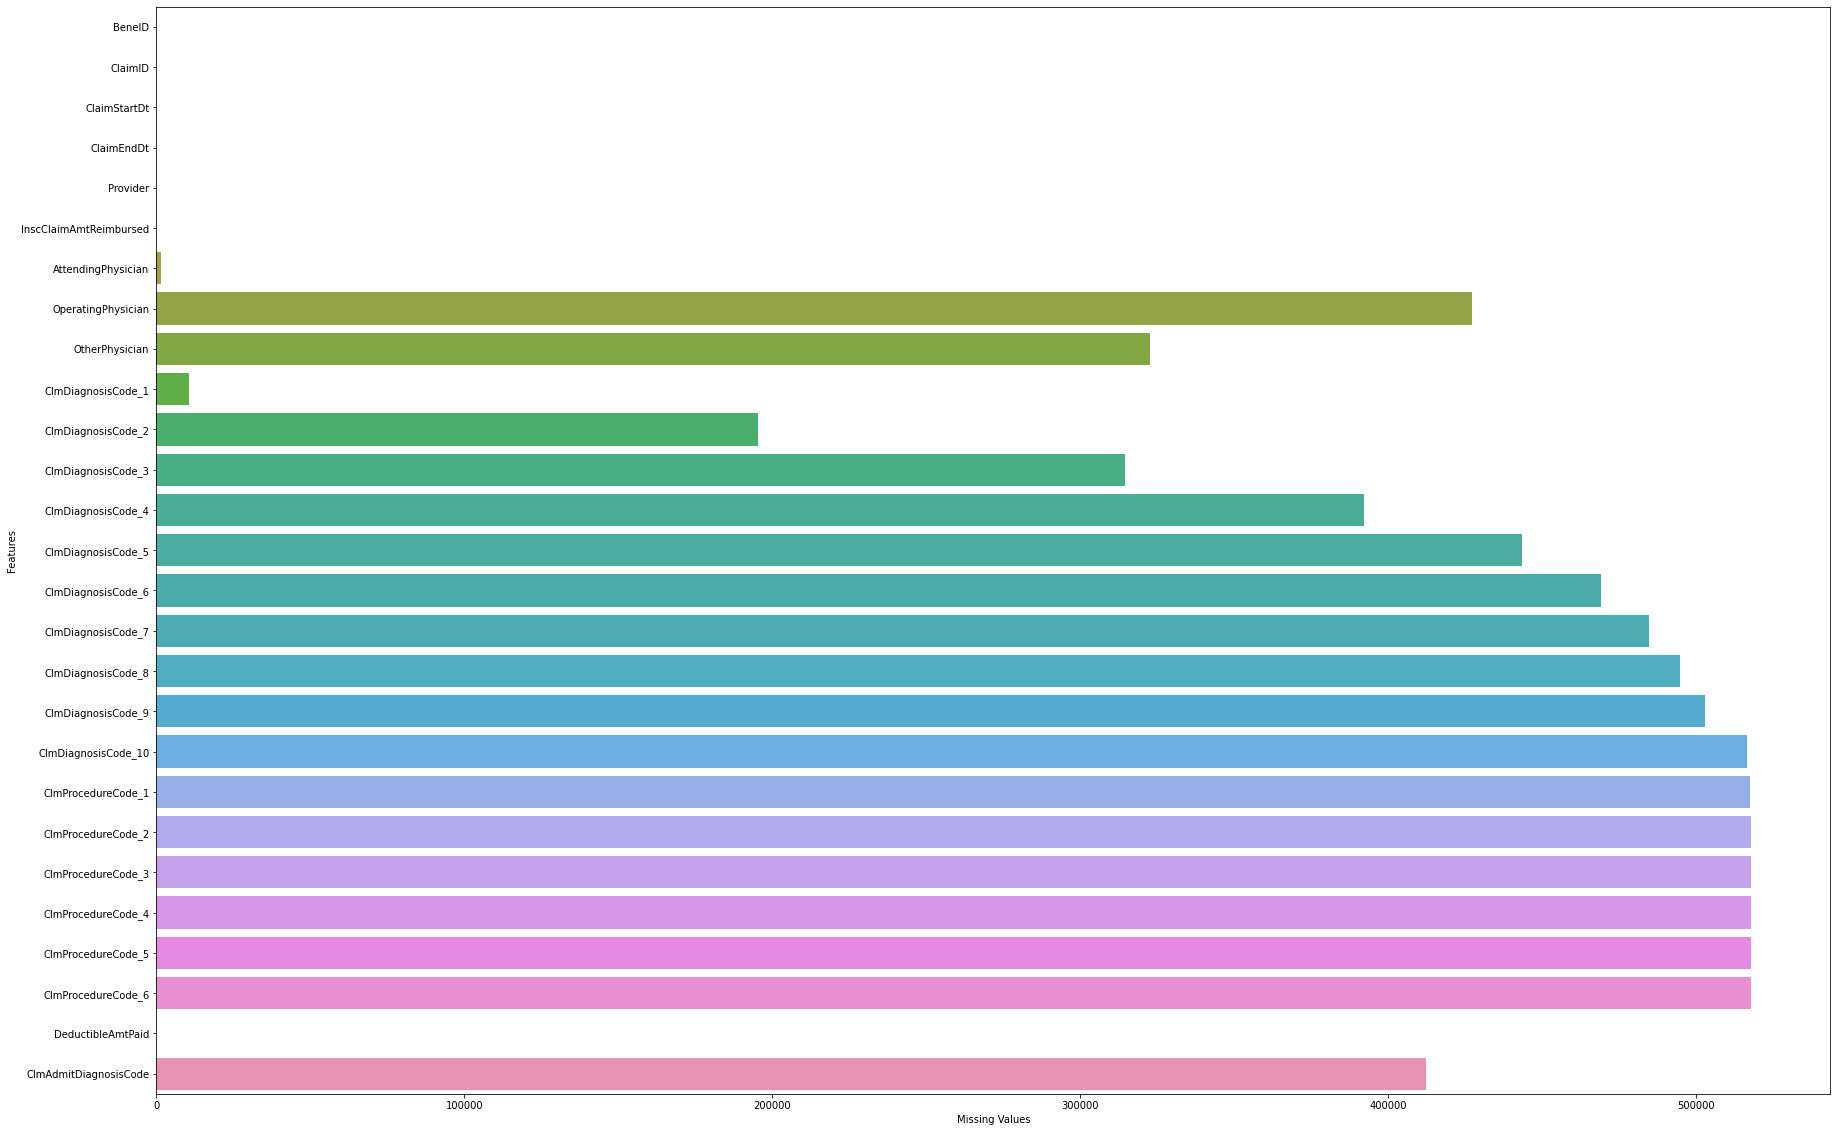

In [20]:
plt.figure(figsize=(30,20))
df2 = pd.DataFrame(train_outpatient_data.isnull().sum()).reset_index()
df2.columns=['Features','Missing Values']
sb.barplot(x='Missing Values',y='Features',data=df2)

### Shape of datasets after adding new variables

In [21]:
print(f"Train Beneficiary : {train_beneficiary_data.shape}")
print(f"Train Inpatient : {train_inpatient_data.shape}")
print(f"Train Outpatient : {train_outpatient_data.shape}")
print(f"Test Beneficiary : {test_beneficiary_data.shape}")
print(f"Test Outpatient : {test_outpatient_data.shape}")
print(f"Test Inpatient : {test_inpatient_data.shape}")
print(f"Train data : {train_data.shape}")
print(f"Test data : {test_data.shape}")

Train Beneficiary : (138556, 27)
Train Inpatient : (40474, 31)
Train Outpatient : (517737, 27)
Test Beneficiary : (63968, 27)
Test Outpatient : (125841, 27)
Test Inpatient : (9551, 31)
Train data : (5410, 2)
Test data : (1353, 1)


### Merge Beneficiary,Inpatient,Outpatient dataset in single dataframe

#### Merging training dataset

In [22]:
Train_patient_merge_columns = [i for i in train_outpatient_data.columns if i in train_inpatient_data.columns]

Train_Patient_data = pd.merge(train_inpatient_data, train_outpatient_data,
                    left_on = Train_patient_merge_columns,
                    right_on = Train_patient_merge_columns,
                    how = 'outer').\
          merge(train_beneficiary_data,left_on='BeneID',right_on='BeneID',how='inner')

#### Merging test dataset

In [23]:
Test_patient_merge_columns = [i for i in test_outpatient_data.columns if i in test_inpatient_data.columns]

Test_Patient_data = pd.merge(test_inpatient_data, test_outpatient_data,
                    left_on = Test_patient_merge_columns,
                    right_on = Test_patient_merge_columns,
                    how = 'outer').\
          merge(test_beneficiary_data,left_on='BeneID',right_on='BeneID',how='inner')

### Shape of datssets after merging

In [24]:
print(f"Shape of Training set : {Train_Patient_data.shape}")
print(f"Shape of Testing set : {Test_Patient_data.shape}")

Shape of Training set : (558211, 57)
Shape of Testing set : (135392, 57)


### Check missing values

<AxesSubplot:xlabel='Missing Values', ylabel='Features'>

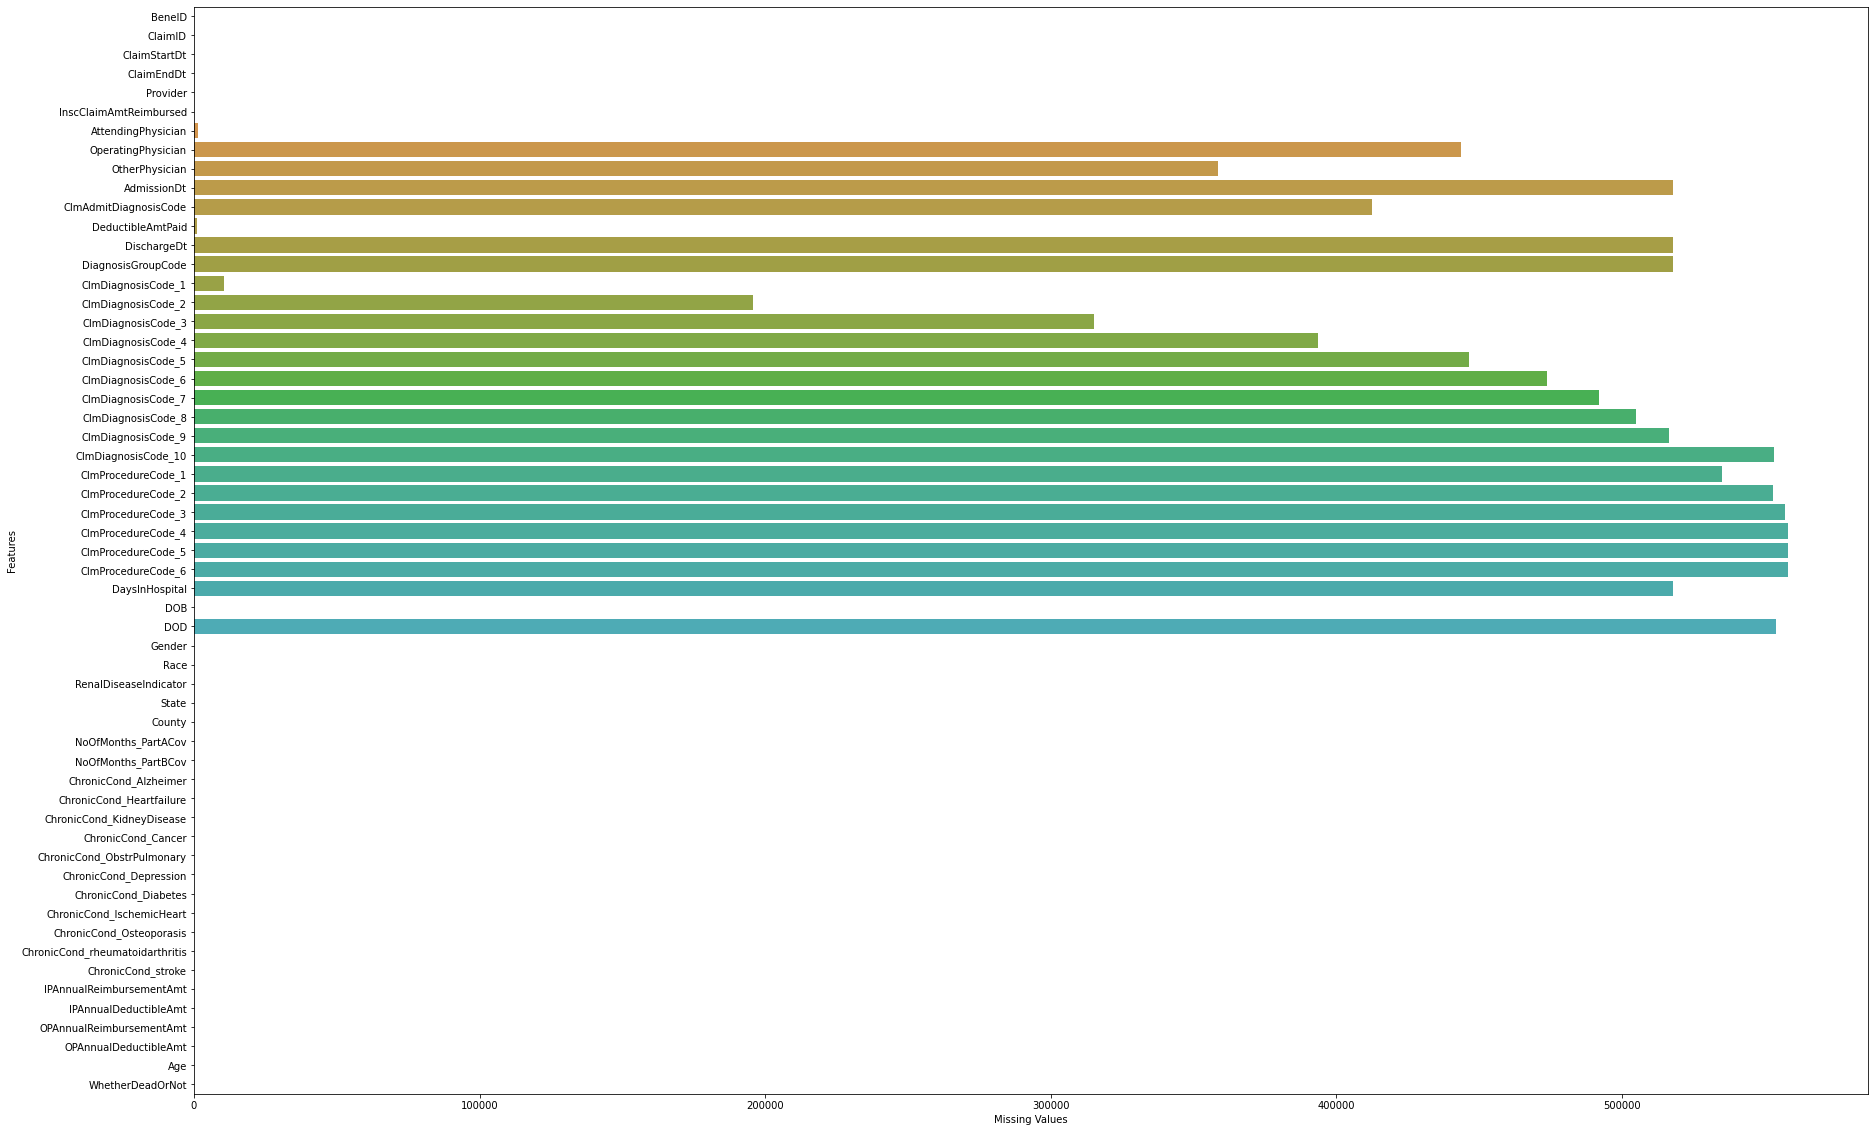

In [25]:
plt.figure(figsize=(30,20))
df3 = pd.DataFrame(Train_Patient_data.isnull().sum()).reset_index()
df3.columns=['Features','Missing Values']
sb.barplot(x='Missing Values',y='Features',data=df3)

### For 'AttendingPhysician' , 'operatingphysician' ,'otherphysician' add 0 for null otherwise 1

In [26]:
Train_Patient_data[['AttendingPhysician','OperatingPhysician','OtherPhysician']] = np.where(Train_Patient_data[['AttendingPhysician','OperatingPhysician','OtherPhysician']].isnull(),0,1)

In [27]:
Train_Patient_data[['AttendingPhysician','OperatingPhysician','OtherPhysician']].head()

,AttendingPhysician,OperatingPhysician,OtherPhysician
0,1,0,0
1,1,1,0
2,1,0,1
3,1,1,1
4,1,0,0


### Add new variable for storing number of physician involved in a claim

In [28]:
Train_Patient_data['N_of_Physician'] = Train_Patient_data['AttendingPhysician']+Train_Patient_data['OperatingPhysician']+Train_Patient_data['OtherPhysician']

In [29]:
Train_Patient_data['N_of_Physician'].head()

0    1
1    2
2    2
3    3
4    1
Name: N_of_Physician, dtype: int64

In [30]:
Train_Patient_data.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                      0
OperatingPhysician                      0
OtherPhysician                          0
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

### Top 20 diagnosis group code

<AxesSubplot:>

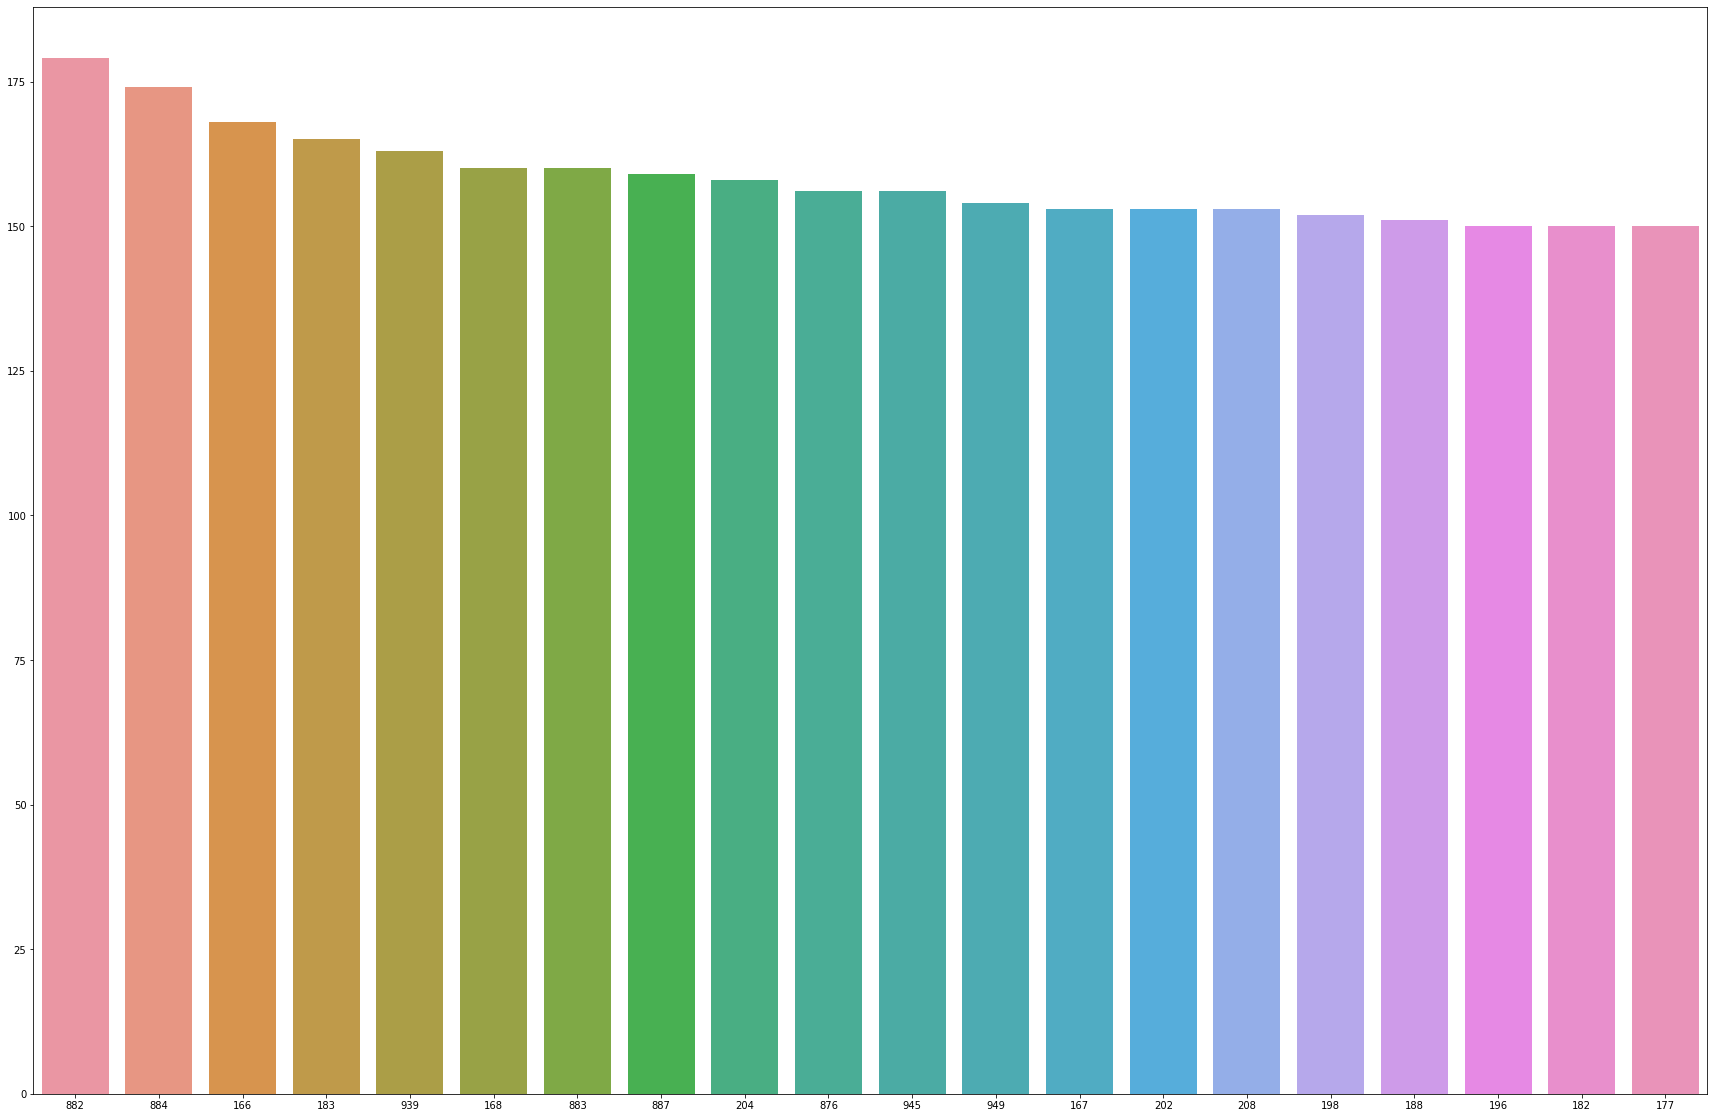

In [31]:
plt.figure(figsize=(30,20))
count_diag_group = Train_Patient_data['DiagnosisGroupCode'].value_counts().sort_values(ascending=False).head(20)
sb.barplot(x=count_diag_group.index,y=count_diag_group.values)

### Create new Column is diagnosiscode and if diagnosisgroup present than enter 1 else 0

In [32]:
Train_Patient_data['IsDiagnosisCode'] = np.where(Train_Patient_data.DiagnosisGroupCode.notnull(), 1, 0)
Train_Patient_data = Train_Patient_data.drop(['DiagnosisGroupCode'], axis = 1)

### Countplot of 'Deductibleamountpaid'

<AxesSubplot:xlabel='DeductibleAmtPaid', ylabel='count'>

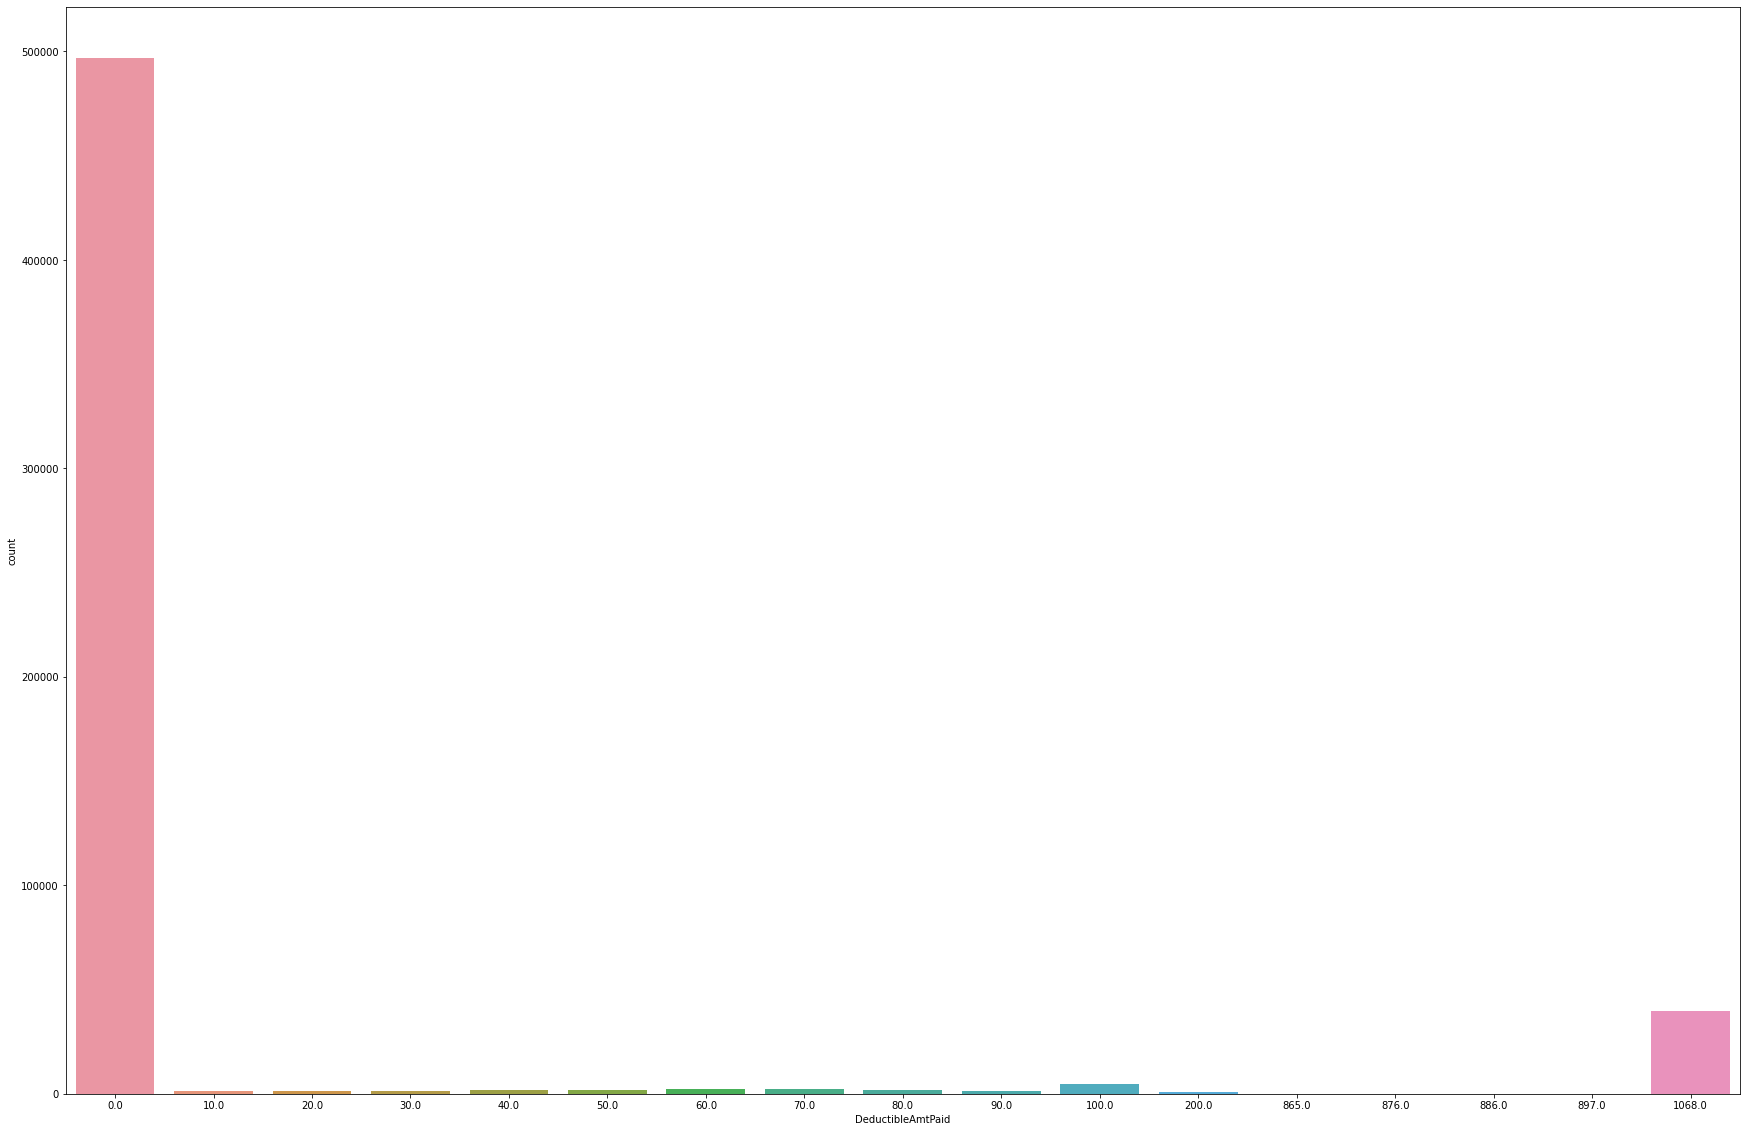

In [33]:
plt.figure(figsize=(30,20))
sb.countplot(x=Train_Patient_data['DeductibleAmtPaid'])

#### From above analysis we can say that we can replace null values with 0 as most of the values are 0

In [34]:
Train_Patient_data['DeductibleAmtPaid'].fillna(0,inplace=True)

### Creating new column to check whether deductible amount is present or not for a particular claim

In [35]:
Train_Patient_data['IsDeductibleAmt'] = np.where(Train_Patient_data['DeductibleAmtPaid']==0,0,1)

<AxesSubplot:xlabel='IsDeductibleAmt', ylabel='count'>

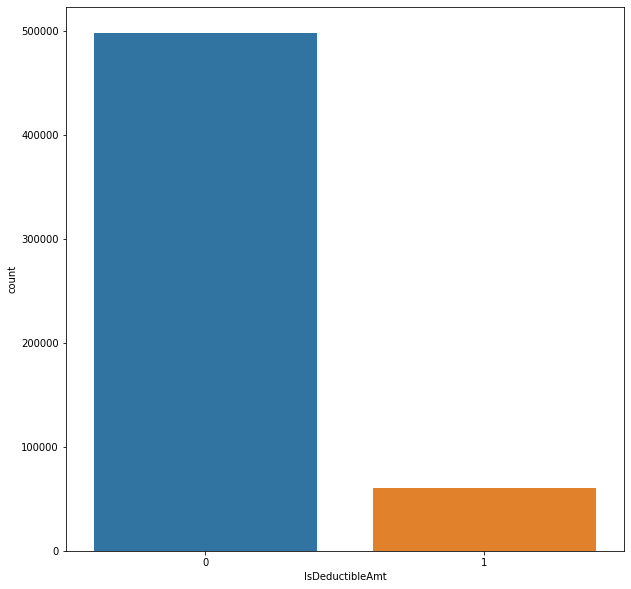

In [36]:
plt.figure(figsize=(10,10))
sb.countplot(x=Train_Patient_data['IsDeductibleAmt'])

#### NOTE : in most of the claims deductible amount is not paid

In [37]:
Train_Patient_data['DaysInHospital'].fillna(0,inplace=True)

### Handle claim procedure codes

In [38]:
Train_Patient_data[['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']] =np.where(Train_Patient_data[['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']].isnull(),0,1) 

In [39]:
Train_Patient_data['N_Procedure_code'] = Train_Patient_data['ClmProcedureCode_1']+Train_Patient_data['ClmProcedureCode_2']+Train_Patient_data['ClmProcedureCode_3']+Train_Patient_data['ClmProcedureCode_4']+Train_Patient_data['ClmProcedureCode_5']+Train_Patient_data['ClmProcedureCode_6']

### Handling claim diagnosis code

In [40]:
Train_Patient_data[['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']] =np.where(Train_Patient_data[['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']].isnull(),0,1)
Train_Patient_data['N_diagnosis_code'] = Train_Patient_data['ClmDiagnosisCode_1']+Train_Patient_data['ClmDiagnosisCode_2']+Train_Patient_data['ClmDiagnosisCode_3']+Train_Patient_data['ClmDiagnosisCode_4']+Train_Patient_data['ClmDiagnosisCode_5']+Train_Patient_data['ClmDiagnosisCode_6']+Train_Patient_data['ClmDiagnosisCode_7']+Train_Patient_data['ClmDiagnosisCode_8']+Train_Patient_data['ClmDiagnosisCode_9']+Train_Patient_data['ClmDiagnosisCode_10']

### Replace '2' with '0'in gender column

In [41]:
Train_Patient_data['Gender'].replace(2,0,inplace=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

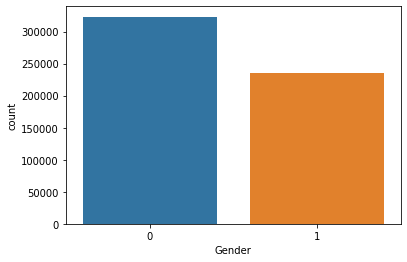

In [42]:
#plt.figure(figsize=(10,10))
sb.countplot(x=Train_Patient_data['Gender'])

### Countplot of Race

<AxesSubplot:xlabel='Race', ylabel='count'>

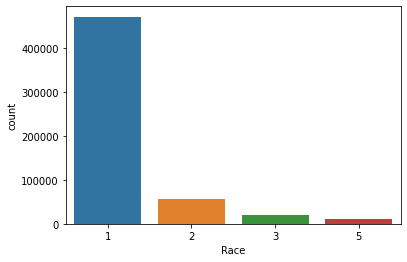

In [43]:
sb.countplot(x=Train_Patient_data['Race'])

### Convert Race using onehotencoding

In [44]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x = onehotencoder.fit_transform(Train_Patient_data.Race.values.reshape(-1, 1)).toarray()

df_OneHot = pd.DataFrame(x, columns = ["Race_"+str(int(i)) for i in range(1,5)]) 
df_OneHot

,Race_1,Race_2,Race_3,Race_4
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
558206,1.0,0.0,0.0,0.0
558207,1.0,0.0,0.0,0.0
558208,1.0,0.0,0.0,0.0
558209,1.0,0.0,0.0,0.0


In [45]:
df_OneHot.drop('Race_1',axis=1,inplace=True)

In [46]:
Train_Patient_data = pd.concat([Train_Patient_data, df_OneHot], axis=1)
Train_Patient_data.drop(['Race'], axis=1,inplace=True)

### Countplot of Renal disease indicator

<AxesSubplot:xlabel='RenalDiseaseIndicator', ylabel='count'>

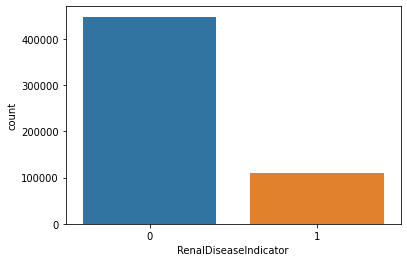

In [47]:
sb.countplot(x=Train_Patient_data['RenalDiseaseIndicator'])

In [48]:
Train_Patient_data['RenalDiseaseIndicator']=Train_Patient_data.RenalDiseaseIndicator.astype(int)

### Barplot of State and County

In [49]:
top_states = Train_Patient_data['State'].value_counts().head(20).sort_values(ascending=False)
top_county = Train_Patient_data['County'].value_counts().head(20).sort_values(ascending=False)

<AxesSubplot:>

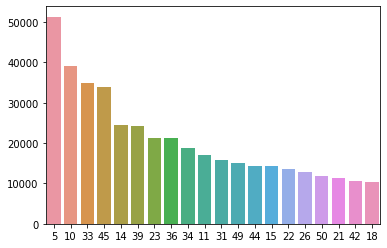

In [50]:
sb.barplot(x=top_states.index,y=top_states.values,order=top_states.index)

<AxesSubplot:>

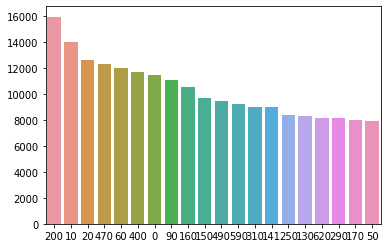

In [51]:
sb.barplot(x=top_county.index,y=top_county.values,order=top_county.index)

### Visualisation of chronic condition variables

In [52]:
chronic_cond = Train_Patient_data[['ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke']]

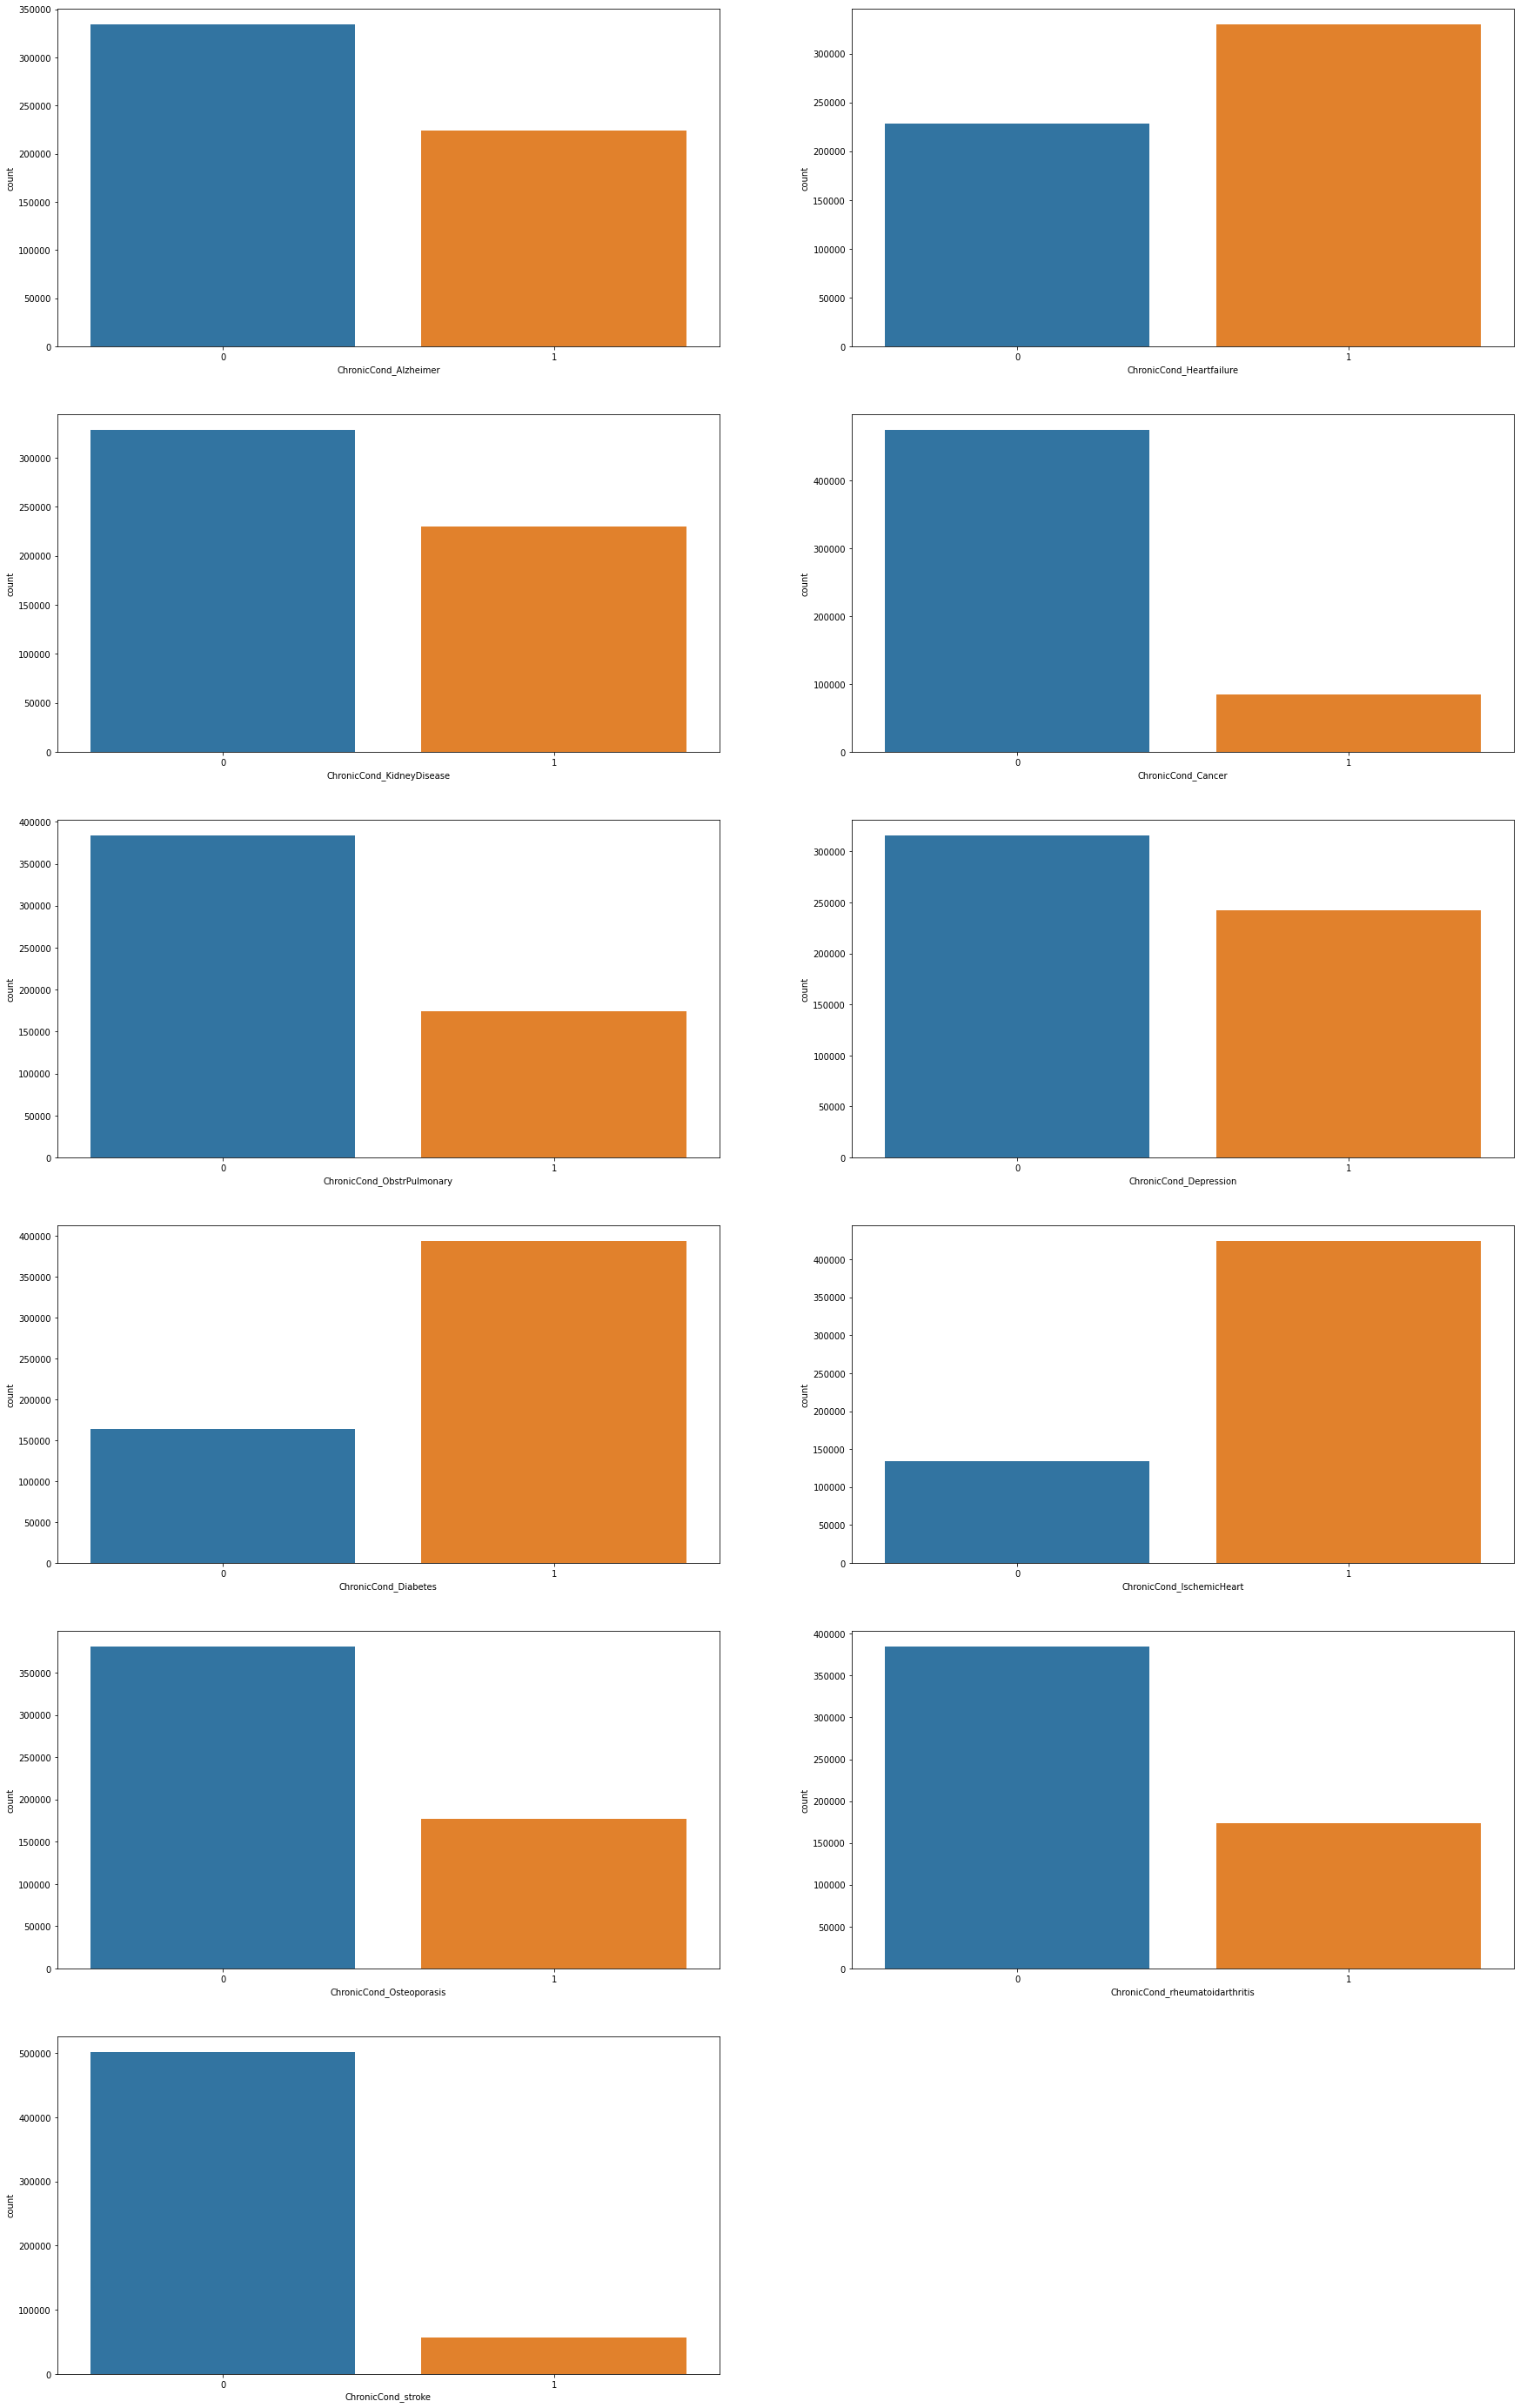

In [53]:
plt.figure(figsize=(30,50))
for i in enumerate(chronic_cond):
    plt.subplot(6,2,i[0]+1)
    sb.countplot(x=i[1],data=Train_Patient_data)

### Perform above operations on Test data also

In [54]:
Test_Patient_data[['AttendingPhysician','OperatingPhysician','OtherPhysician']] = np.where(Test_Patient_data[['AttendingPhysician','OperatingPhysician','OtherPhysician']].isnull(),0,1)
Test_Patient_data['N_of_Physician'] = Test_Patient_data['AttendingPhysician']+Test_Patient_data['OperatingPhysician']+Test_Patient_data['OtherPhysician']
Test_Patient_data['IsDiagnosisCode'] = np.where(Test_Patient_data.DiagnosisGroupCode.notnull(),1,0)
Test_Patient_data.drop(['DiagnosisGroupCode'],axis=1,inplace=True)
Test_Patient_data['DeductibleAmtPaid'].fillna(0,inplace=True)
Test_Patient_data['IsDeductibleAmt'] = np.where(Test_Patient_data['DeductibleAmtPaid']==0,0,1)
Test_Patient_data['DaysInHospital'].fillna(0,inplace=True)
Test_Patient_data['Gender'].replace(2,0,inplace=True)
onehotencoder1 = OneHotEncoder()
x = onehotencoder1.fit_transform(Test_Patient_data.Race.values.reshape(-1, 1)).toarray()

df_OneHot1 = pd.DataFrame(x, columns = ["Race_"+str(int(i)) for i in range(1,5)])
df_OneHot1.drop('Race_1',axis=1,inplace=True)
Test_Patient_data = pd.concat([Test_Patient_data, df_OneHot1], axis=1)
Test_Patient_data.drop(['Race'], axis=1,inplace=True)
Test_Patient_data['RenalDiseaseIndicator']=Test_Patient_data.RenalDiseaseIndicator.astype(int)
Test_Patient_data[['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']] =np.where(Test_Patient_data[['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']].isnull(),0,1)
Test_Patient_data['N_Procedure_code'] = Test_Patient_data['ClmProcedureCode_1']+Test_Patient_data['ClmProcedureCode_2']+Test_Patient_data['ClmProcedureCode_3']+Test_Patient_data['ClmProcedureCode_4']+Test_Patient_data['ClmProcedureCode_5']+Test_Patient_data['ClmProcedureCode_6']
Test_Patient_data[['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']] =np.where(Test_Patient_data[['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']].isnull(),0,1)
Test_Patient_data['N_diagnosis_code'] = Test_Patient_data['ClmDiagnosisCode_1']+Test_Patient_data['ClmDiagnosisCode_2']+Test_Patient_data['ClmDiagnosisCode_3']+Test_Patient_data['ClmDiagnosisCode_4']+Test_Patient_data['ClmDiagnosisCode_5']+Test_Patient_data['ClmDiagnosisCode_6']+Test_Patient_data['ClmDiagnosisCode_7']+Test_Patient_data['ClmDiagnosisCode_8']+Test_Patient_data['ClmDiagnosisCode_9']+Test_Patient_data['ClmDiagnosisCode_10']

### Get count of BeneID,claimID for each provider

In [55]:
Train_Count = Train_Patient_data[['BeneID','ClaimID']].groupby(Train_Patient_data['Provider']).nunique().reset_index()
Train_Count.columns=['Provider','BeneID_Count','ClaimID_Count']
Train_Count.head()

,Provider,BeneID_Count,ClaimID_Count
0,PRV51001,24,25
1,PRV51003,117,132
2,PRV51004,138,149
3,PRV51005,495,1165
4,PRV51007,58,72


In [56]:
Test_Count = Test_Patient_data[['BeneID','ClaimID']].groupby(Test_Patient_data['Provider']).nunique().reset_index()
Test_Count.columns=['Provider','BeneID_Count','ClaimID_Count']

In [57]:
Train_Data_Sum = Train_Patient_data.groupby(['Provider'], as_index = False)[['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'RenalDiseaseIndicator', 
                                                     'AttendingPhysician','OperatingPhysician','OtherPhysician','DaysInHospital',
                                                    'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_Cancer', 
                                                    'ChronicCond_KidneyDisease', 'ChronicCond_ObstrPulmonary',
                                                   'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',   
                                                    'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
                                                    'ChronicCond_stroke', 'IPAnnualReimbursementAmt','IPAnnualDeductibleAmt',
                                                    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'WhetherDeadOrNot',
                                                    'N_of_Physician','IsDiagnosisCode', 'N_Procedure_code', 'N_diagnosis_code']].sum()

Test_Data_Sum = Test_Patient_data.groupby(['Provider'], as_index = False)[['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'RenalDiseaseIndicator', 
                                                     'AttendingPhysician','OperatingPhysician','OtherPhysician','DaysInHospital',
                                                    'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_Cancer', 
                                                    'ChronicCond_KidneyDisease', 'ChronicCond_ObstrPulmonary',
                                                   'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',   
                                                    'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
                                                    'ChronicCond_stroke', 'IPAnnualReimbursementAmt','IPAnnualDeductibleAmt',
                                                    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'WhetherDeadOrNot',
                                                    'N_of_Physician','IsDiagnosisCode', 'N_Procedure_code', 'N_diagnosis_code']].sum()

In [58]:
Train_Data_Sum.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,AttendingPhysician,OperatingPhysician,OtherPhysician,DaysInHospital,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDeadOrNot,N_of_Physician,IsDiagnosisCode,N_Procedure_code,N_diagnosis_code
0,PRV51001,104640,5340.0,8,25,5,10,0.07,15,19,...,6,440150,22428,65380,11598,0.0,40,5,3,80
1,PRV51003,605670,66286.0,29,132,45,25,0.91,56,80,...,12,999000,122948,353520,97300,1.0,202,62,48,693
2,PRV51004,52170,310.0,23,149,27,63,0.00,64,88,...,17,648430,64808,327040,92790,1.0,239,0,0,385
3,PRV51005,280910,3700.0,259,1163,222,478,0.00,426,680,...,124,4221950,441724,2457840,741323,4.0,1863,0,0,3016
4,PRV51007,33710,3264.0,11,72,12,26,0.04,26,40,...,12,219600,32040,124540,33820,1.0,110,3,1,215


In [59]:
Train_Data_Mean=round(Train_Patient_data.groupby(['Provider'], as_index = False)[['NoOfMonths_PartACov', 'NoOfMonths_PartBCov','Age']].mean())
Test_Data_Mean=round(Test_Patient_data.groupby(['Provider'], as_index = False)[['NoOfMonths_PartACov', 'NoOfMonths_PartBCov','Age']].mean())

In [60]:
Train_Data_Mean.head()

,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,Age
0,PRV51001,12.0,12.0,78.0
1,PRV51003,12.0,12.0,69.0
2,PRV51004,12.0,12.0,71.0
3,PRV51005,12.0,12.0,70.0
4,PRV51007,12.0,12.0,68.0


### Merge count,sum,mean dataframes

In [61]:
Train_df=pd.merge(Train_Count,Train_Data_Sum,on='Provider',how='left').\
                merge(Train_Data_Mean,on='Provider',how='left').\
                merge(train_data,on='Provider',how='left')
Test_df=pd.merge(Test_Count,Test_Data_Sum,on='Provider',how='left').\
                merge(Test_Data_Mean,on='Provider',how='left').\
                merge(test_data,on='Provider',how='left')

In [62]:
Train_df.head()

,Provider,BeneID_Count,ClaimID_Count,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,AttendingPhysician,OperatingPhysician,OtherPhysician,DaysInHospital,...,OPAnnualDeductibleAmt,WhetherDeadOrNot,N_of_Physician,IsDiagnosisCode,N_Procedure_code,N_diagnosis_code,NoOfMonths_PartACov,NoOfMonths_PartBCov,Age,PotentialFraud
0,PRV51001,24,25,104640,5340.0,8,25,5,10,0.07,...,11598,0.0,40,5,3,80,12.0,12.0,78.0,No
1,PRV51003,117,132,605670,66286.0,29,132,45,25,0.91,...,97300,1.0,202,62,48,693,12.0,12.0,69.0,Yes
2,PRV51004,138,149,52170,310.0,23,149,27,63,0.00,...,92790,1.0,239,0,0,385,12.0,12.0,71.0,No
3,PRV51005,495,1165,280910,3700.0,259,1163,222,478,0.00,...,741323,4.0,1863,0,0,3016,12.0,12.0,70.0,Yes
4,PRV51007,58,72,33710,3264.0,11,72,12,26,0.04,...,33820,1.0,110,3,1,215,12.0,12.0,68.0,No


In [63]:
Train_df.isnull().sum()

Provider                           0
BeneID_Count                       0
ClaimID_Count                      0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
RenalDiseaseIndicator              0
AttendingPhysician                 0
OperatingPhysician                 0
OtherPhysician                     0
DaysInHospital                     0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_Cancer                 0
ChronicCond_KidneyDisease          0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
WhetherDeadOrNot                   0
N_of_Physician                     0
I

In [64]:
Train_df['PotentialFraud']=np.where(Train_df.PotentialFraud == "Yes", 1, 0)

### Check for data imbalance

<AxesSubplot:xlabel='PotentialFraud', ylabel='count'>

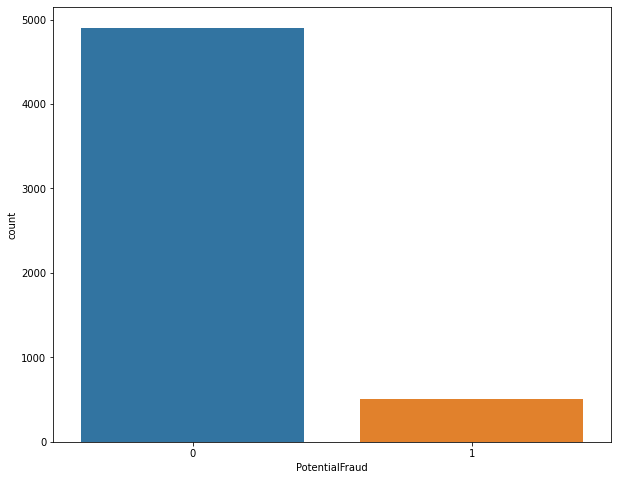

In [65]:
plt.figure(figsize=(10,8))
sb.countplot(Train_df.PotentialFraud)

In [66]:
Train_df.head()

,Provider,BeneID_Count,ClaimID_Count,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,AttendingPhysician,OperatingPhysician,OtherPhysician,DaysInHospital,...,OPAnnualDeductibleAmt,WhetherDeadOrNot,N_of_Physician,IsDiagnosisCode,N_Procedure_code,N_diagnosis_code,NoOfMonths_PartACov,NoOfMonths_PartBCov,Age,PotentialFraud
0,PRV51001,24,25,104640,5340.0,8,25,5,10,0.07,...,11598,0.0,40,5,3,80,12.0,12.0,78.0,0
1,PRV51003,117,132,605670,66286.0,29,132,45,25,0.91,...,97300,1.0,202,62,48,693,12.0,12.0,69.0,1
2,PRV51004,138,149,52170,310.0,23,149,27,63,0.00,...,92790,1.0,239,0,0,385,12.0,12.0,71.0,0
3,PRV51005,495,1165,280910,3700.0,259,1163,222,478,0.00,...,741323,4.0,1863,0,0,3016,12.0,12.0,70.0,1
4,PRV51007,58,72,33710,3264.0,11,72,12,26,0.04,...,33820,1.0,110,3,1,215,12.0,12.0,68.0,0


### Bivariate data analysis

<AxesSubplot:xlabel='PotentialFraud', ylabel='BeneID_Count'>

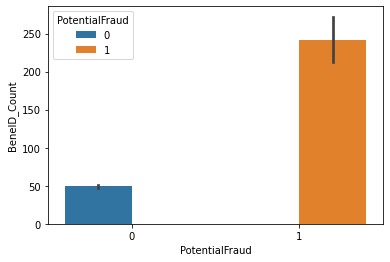

In [67]:
sb.barplot(Train_df["PotentialFraud"],Train_df["BeneID_Count"], hue=Train_df["PotentialFraud"])

<AxesSubplot:xlabel='PotentialFraud', ylabel='InscClaimAmtReimbursed'>

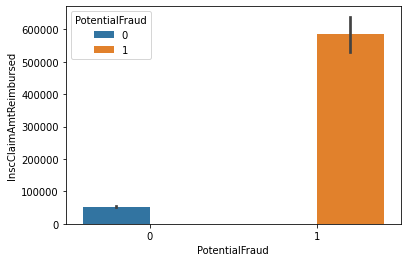

In [68]:
sb.barplot(Train_df["PotentialFraud"],Train_df["InscClaimAmtReimbursed"], hue=Train_df["PotentialFraud"])

<AxesSubplot:xlabel='PotentialFraud', ylabel='DeductibleAmtPaid'>

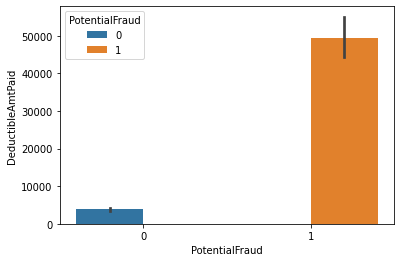

In [69]:
sb.barplot(Train_df["PotentialFraud"],Train_df["DeductibleAmtPaid"], hue=Train_df["PotentialFraud"])

<AxesSubplot:xlabel='PotentialFraud', ylabel='RenalDiseaseIndicator'>

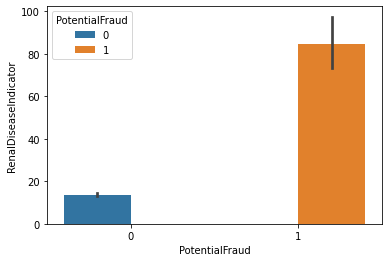

In [70]:
sb.barplot(Train_df["PotentialFraud"],Train_df["RenalDiseaseIndicator"], hue=Train_df["PotentialFraud"])

<AxesSubplot:xlabel='PotentialFraud', ylabel='DaysInHospital'>

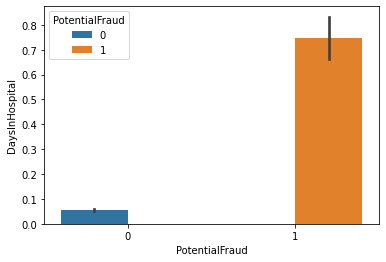

In [71]:
sb.barplot(Train_df["PotentialFraud"],Train_df["DaysInHospital"], hue=Train_df["PotentialFraud"])

<AxesSubplot:xlabel='PotentialFraud', ylabel='WhetherDeadOrNot'>

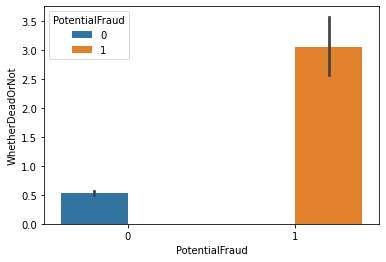

In [72]:
sb.barplot(Train_df["PotentialFraud"],Train_df["WhetherDeadOrNot"], hue=Train_df["PotentialFraud"])

### Correlation matrix

<AxesSubplot:>

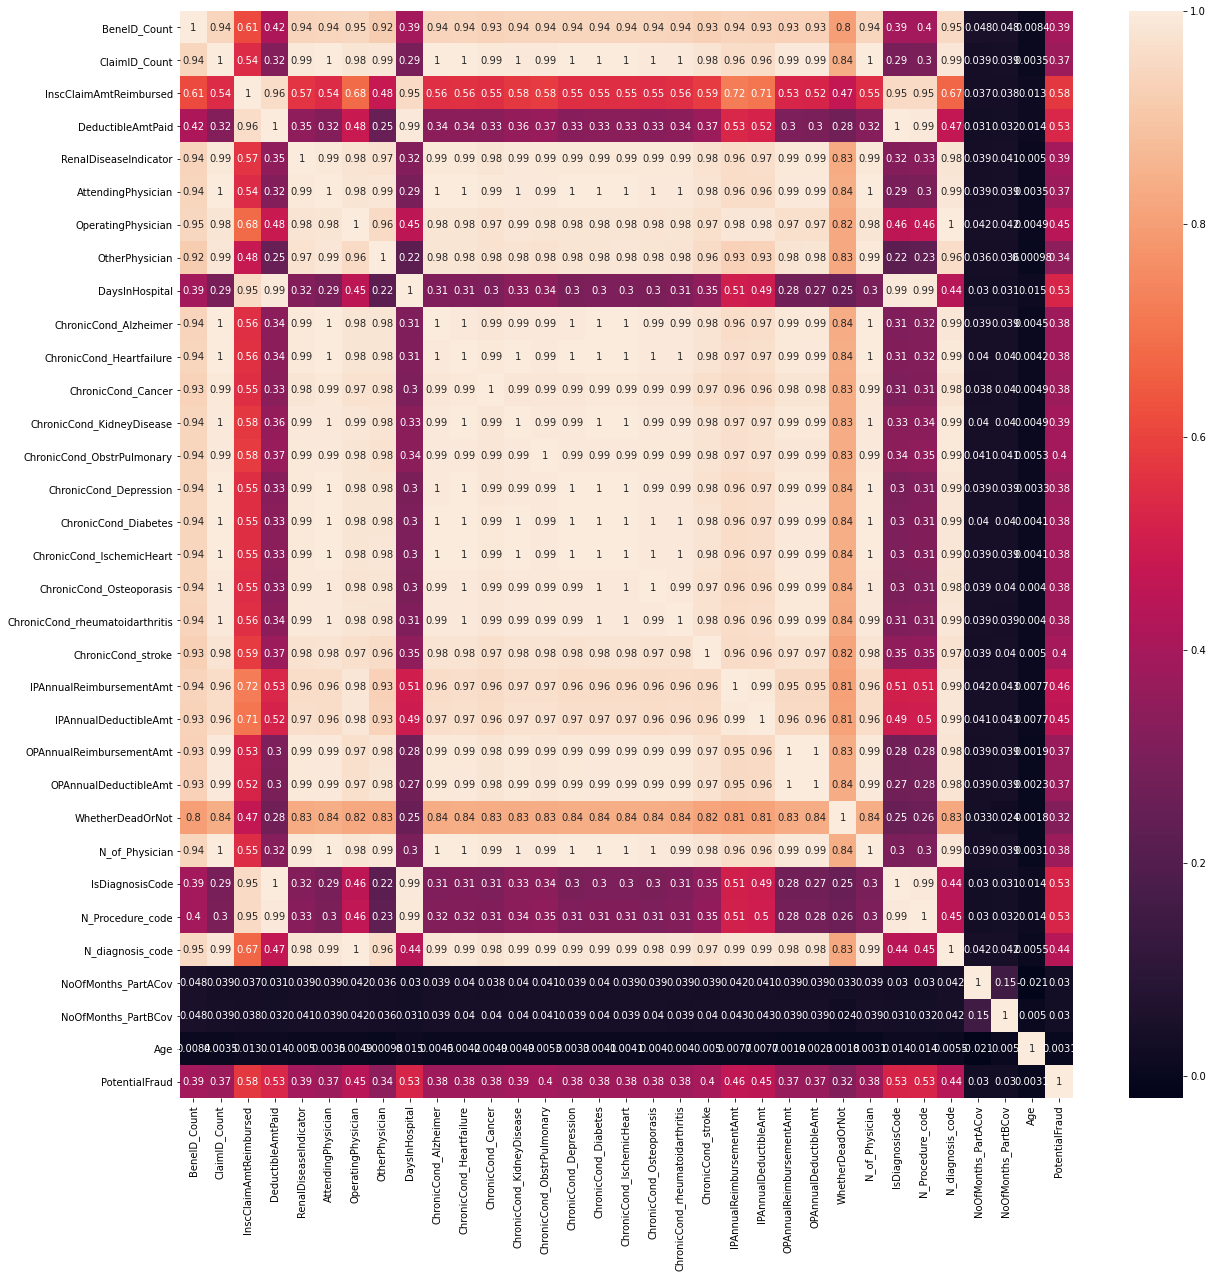

In [73]:
plt.figure(figsize=(20,20))
sb.heatmap(Train_df.corr(),annot=True)

### Remove Age,NoOfMonths_PartACov,NoOfMonths_PartBCov variables as they are not making any relation with the target variable

In [74]:
Train_df.drop(['Age','NoOfMonths_PartACov','NoOfMonths_PartBCov'],axis=1,inplace=True)

### Remove all id features

In [75]:
Train_df.drop(['Provider','BeneID_Count','ClaimID_Count'],axis=1,inplace=True)

In [76]:
Test_df.drop(['Age','NoOfMonths_PartACov','NoOfMonths_PartBCov'],axis=1,inplace=True)
Test_df.drop(['Provider','BeneID_Count','ClaimID_Count'],axis=1,inplace=True)

### Our data is imbalanced hence we need to perform upsampling or downsampling to handle this

### Separate Majority and Minority class

In [77]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = Train_df[Train_df.PotentialFraud==0]
df_minority = Train_df[Train_df.PotentialFraud==1]

print(df_majority.PotentialFraud.count())
print("-----------")
print(df_minority.PotentialFraud.count())
print("-----------")
print(Train_df.PotentialFraud.value_counts())

4904
-----------
506
-----------
0    4904
1     506
Name: PotentialFraud, dtype: int64


### Using Upsampling

In [78]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=3800,    # to match majority class
                                 random_state=42) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.PotentialFraud.value_counts()

0    4904
1    3800
Name: PotentialFraud, dtype: int64

### Using Downsampling

In [79]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1500,     # to match minority class
                                 random_state=42) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.PotentialFraud.value_counts()

0    1500
1     506
Name: PotentialFraud, dtype: int64

### Decision Tree on upsampled data

In [80]:
x = df_upsampled.drop(['PotentialFraud'],axis=1)
y = df_upsampled[['PotentialFraud']]

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=42)

### Hyperparameter tuning for Decision Tree

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [83]:
from sklearn.metrics import make_scorer,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1,5))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf1 = DecisionTreeClassifier(random_state=0)
tree_cv1 = GridSearchCV(tree_clf1, params, scoring=make_scorer(f1_score), n_jobs=-1, verbose=1, cv=5)
tree_cv1.fit(x_train,y_train)
best_params = tree_cv1.best_params_
print(f"Best paramters: {best_params})")

tree_clf1 = DecisionTreeClassifier(**best_params)
tree_clf1.fit(x_train,y_train)
print_score(tree_clf1, x_train,y_train, x_test, y_test, train=True)
print_score(tree_clf1, x_train,y_train, x_test, y_test, train=False)

Fitting 5 folds for each of 912 candidates, totalling 4560 fits
Best paramters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 17, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 87.28%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.875000     0.869688  0.872846     0.872344      0.872732
recall        0.907754     0.826009  0.872846     0.866881      0.872846
f1-score      0.891076     0.847286  0.872846     0.869181      0.872376
support    1496.000000  1115.000000  0.872846  2611.000000   2611.000000
_______________________________________________
Confusion Matrix: 
 [[1358  138]
 [ 194  921]]

Test Result:
Accuracy Score: 86.00%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.859961     0.860063  0.860003     0.860012      

### Decision Tree on Downsampled data

In [84]:
x = df_downsampled.drop(['PotentialFraud'],axis=1)
y = df_downsampled[['PotentialFraud']]

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=42)

In [86]:
from sklearn.metrics import make_scorer,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1,5))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf2 = DecisionTreeClassifier(random_state=0)
tree_cv2 = GridSearchCV(tree_clf2, params, scoring=make_scorer(f1_score), n_jobs=-1, verbose=1, cv=5)
tree_cv2.fit(x_train,y_train)
best_params = tree_cv2.best_params_
print(f"Best paramters: {best_params})")

tree_clf2 = DecisionTreeClassifier(**best_params)
tree_clf2.fit(x_train,y_train)
print_score(tree_clf2, x_train,y_train, x_test, y_test, train=True)
print_score(tree_clf2, x_train,y_train, x_test, y_test, train=False)

Fitting 5 folds for each of 912 candidates, totalling 4560 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 88.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.930394    0.782353  0.888519    0.856374      0.890243
recall       0.915525    0.815951  0.888519    0.865738      0.888519
f1-score     0.922900    0.798799  0.888519    0.860849      0.889242
support    438.000000  163.000000  0.888519  601.000000    601.000000
_______________________________________________
Confusion Matrix: 
 [[401  37]
 [ 30 133]]

Test Result:
Accuracy Score: 88.75%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.930476    0.760563  0.887544     0.845520      0.888996
recall       

### Random Forest on upsampled data

In [87]:
x = df_upsampled.drop(['PotentialFraud'],axis=1)
y = df_upsampled[['PotentialFraud']]

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=42)

In [89]:
from sklearn.metrics import make_scorer,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"),  
    "max_depth":(list(range(1,5))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)),
}


rf_clf1 = RandomForestClassifier()
rf_cv1 = GridSearchCV(rf_clf1, params, scoring=make_scorer(f1_score), n_jobs=-1, verbose=1, cv=5)
rf_cv1.fit(x_train,y_train)
best_params = rf_cv1.best_params_
print(f"Best paramters: {best_params})")

rf_clf1 = RandomForestClassifier(**best_params)
rf_clf1.fit(x_train,y_train)
print_score(rf_clf1, x_train,y_train, x_test, y_test, train=True)
print_score(rf_clf1, x_train,y_train, x_test, y_test, train=False)


Fitting 5 folds for each of 456 candidates, totalling 2280 fits
Best paramters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 3})
Train Result:
Accuracy Score: 88.97%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.905369     0.868867  0.889697     0.887118      0.889781
recall        0.901738     0.873543  0.889697     0.887640      0.889697
f1-score      0.903550     0.871199  0.889697     0.887374      0.889735
support    1496.000000  1115.000000  0.889697  2611.000000   2611.000000
_______________________________________________
Confusion Matrix: 
 [[1349  147]
 [ 141  974]]

Test Result:
Accuracy Score: 87.15%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.890045     0.848607  0.871492     0.869326      0.871784
recall      

### Random Forest on downsampled data

In [90]:
x = df_downsampled.drop(['PotentialFraud'],axis=1)
y = df_downsampled[['PotentialFraud']]

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=42)

In [92]:
params = {
    "criterion":("gini", "entropy"),  
    "max_depth":(list(range(1,5))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)),
}


rf_clf2 = RandomForestClassifier()
rf_cv2 = GridSearchCV(rf_clf2, params, scoring=make_scorer(f1_score), n_jobs=-1, verbose=1, cv=5)
rf_cv2.fit(x_train,y_train)
best_params = rf_cv2.best_params_
print(f"Best paramters: {best_params})")

rf_clf2 = RandomForestClassifier(**best_params)
rf_clf2.fit(x_train,y_train)
print_score(rf_clf2, x_train,y_train, x_test, y_test, train=True)
print_score(rf_clf2, x_train,y_train, x_test, y_test, train=False)

Fitting 5 folds for each of 456 candidates, totalling 2280 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 4})
Train Result:
Accuracy Score: 89.35%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.928899    0.800000  0.893511    0.864450      0.893940
recall       0.924658    0.809816  0.893511    0.867237      0.893511
f1-score     0.926773    0.804878  0.893511    0.865826      0.893714
support    438.000000  163.000000  0.893511  601.000000    601.000000
_______________________________________________
Confusion Matrix: 
 [[405  33]
 [ 31 132]]

Test Result:
Accuracy Score: 88.47%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.924528    0.762319  0.884698     0.843424      0.884928
recall        0.922787    0.7

### Random forest on SMOTE

In [93]:
x = Train_df.drop(['PotentialFraud'],axis=1)
y = Train_df[['PotentialFraud']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=42)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_SMOTE, y_SMOTE = sm.fit_resample(x_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())
print(y_SMOTE.value_counts())

2952
PotentialFraud    1476
dtype: int64
PotentialFraud
1                 1476
0                 1476
dtype: int64


In [94]:
params = {
    "criterion":("gini", "entropy"),  
    "max_depth":(list(range(1,5))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)),
}


rf_clf3 = RandomForestClassifier()
rf_cv3 = GridSearchCV(rf_clf3, params, scoring=make_scorer(f1_score), n_jobs=-1, verbose=1, cv=5)
rf_cv3.fit(x_train,y_train)
best_params = rf_cv3.best_params_
print(f"Best paramters: {best_params})")

rf_clf3 = RandomForestClassifier(**best_params)
rf_clf3.fit(x_train,y_train)
print_score(rf_clf3, x_SMOTE,y_SMOTE, x_test, y_test, train=True)
print_score(rf_clf3, x_SMOTE,y_SMOTE, x_test, y_test, train=False)

Fitting 5 folds for each of 456 candidates, totalling 2280 fits
Best paramters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2})
Train Result:
Accuracy Score: 68.87%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.617066     0.986038  0.688686     0.801552      0.801552
recall        0.994580     0.382791  0.688686     0.688686      0.688686
f1-score      0.761608     0.551489  0.688686     0.656548      0.656548
support    1476.000000  1476.000000  0.688686  2952.000000   2952.000000
_______________________________________________
Confusion Matrix: 
 [[1468    8]
 [ 911  565]]

Test Result:
Accuracy Score: 93.21%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.933789    0.886364  0.932136     0.910076      0.929293
recall        

### Hyperparameter tuning for XGB

In [98]:
x = df_upsampled.drop(['PotentialFraud'],axis=1)
y = df_upsampled[['PotentialFraud']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=42)

def hyperParameterTuning(X_downsampled, y_downsampled):
    param_tuning = {
        'learning_rate': [0.01, 0.1,0.3],
        'max_depth': [3, 5, 7, 10],
        #'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7,1],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
    }

    xgb_model = XGBClassifier()
    acc_scorer = make_scorer(f1_score)

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = acc_scorer,  
                           cv = 5,
                           verbose = 2,
                           n_jobs = -1
                          )

    gsearch.fit(X_downsampled,y_downsampled)

    return gsearch.best_params_

In [99]:
from xgboost import XGBClassifier
hyperParameterTuning(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[11:34:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'colsample_bytree': 0.5,
 'learning_rate': 0.3,
 'max_depth': 7,
 'n_estimators': 500,
 'subsample': 0.7}

In [101]:
xgb = XGBClassifier(
        colsample_bytree= 0.5,
        learning_rate= 0.3,
        max_depth= 7,
        n_estimators= 500,
        subsample= 0.7)

xgb.fit(x_train,y_train)

[11:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
print_score(xgb, x_SMOTE,y_SMOTE, x_test, y_test, train=True)
print_score(xgb, x_SMOTE,y_SMOTE, x_test, y_test, train=False)

Train Result:
Accuracy Score: 91.40%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.904101     0.924306  0.913957     0.914203      0.914203
recall        0.926152     0.901762  0.913957     0.913957      0.913957
f1-score      0.914993     0.912894  0.913957     0.913944      0.913944
support    1476.000000  1476.000000  0.913957  2952.000000   2952.000000
_______________________________________________
Confusion Matrix: 
 [[1367  109]
 [ 145 1331]]

Test Result:
Accuracy Score: 93.40%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.971751     0.892673  0.934023     0.932212      0.936904
recall        0.908451     0.966480  0.934023     0.937466      0.934023
f1-score      0.939035     0.928112  0.934023     0.933574      0.934222
support    3408.000000  2685.000

### Hence XGBoost on upsampled data is considered as the best model and we will use it

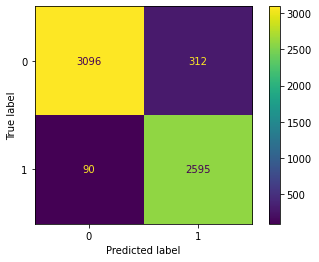

In [104]:
from sklearn import metrics
metrics.plot_confusion_matrix(xgb,x_test,y_test)